In [ ]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/Admission_Predict.csv')

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data.describe()

In [ ]:
data.dtypes

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.boxplot(x = data.SOP)

In [ ]:
sns.boxplot(x = data["GRE Score"])

In [6]:
data = data.drop('Serial No.', axis = 'columns')

In [35]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [36]:
data.shape

(400, 8)

In [7]:
data["Chance of Admit "] = [1 if each >= 0.75 else 0 for each in data["Chance of Admit "]]

In [8]:
from sklearn import linear_model, metrics

In [ ]:
data

In [9]:
X = data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]]

In [10]:
Y = data[["Chance of Admit "]]

In [ ]:
X

In [ ]:
Y

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [13]:
modeldt = DecisionTreeRegressor(random_state = 1)

In [14]:
modeldt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

In [15]:
Ypred = modeldt.predict(X_test)

In [ ]:
Ypred

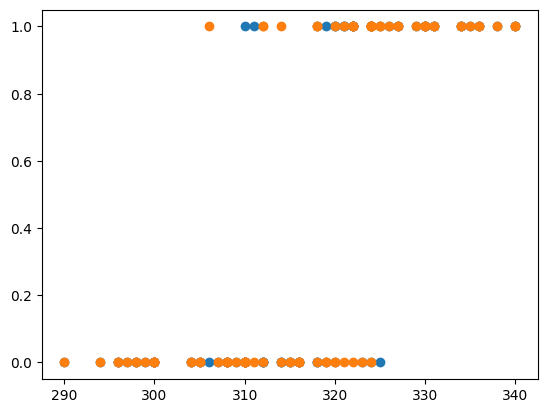

In [16]:
plt.scatter(X_test["GRE Score"],Y_test)
plt.scatter(X_test["GRE Score"], Ypred)
plt.show()

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

<function matplotlib.pyplot.show(close=None, block=None)>

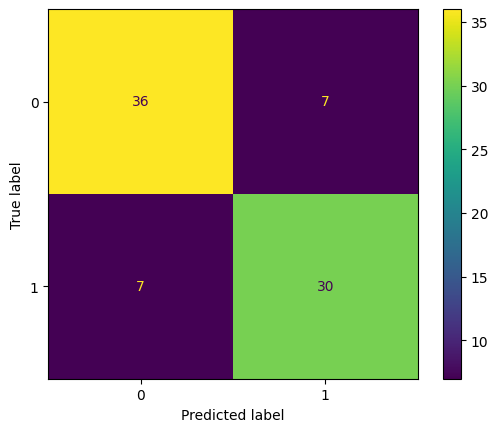

In [18]:
ConfusionMatrixDisplay.from_predictions(Y_test, Ypred)
plt.show

In [19]:
print(accuracy_score(Y_test,Ypred))

0.825


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

In [22]:
import numpy as np

In [23]:
reg = RandomForestRegressor(max_depth = 3, random_state = 1)

In [24]:
reg.fit(X_train, np.ravel(Y_train))

RandomForestRegressor(max_depth=3, random_state=1)

In [25]:
Ypred = reg.predict(X_test)

In [ ]:
Ypred

In [26]:
Ypred = [1 if each >= 0.75 else 0 for each in Ypred]

<function matplotlib.pyplot.show(close=None, block=None)>

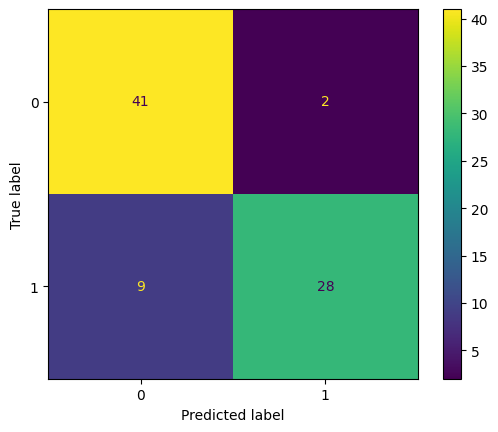

In [27]:
ConfusionMatrixDisplay.from_predictions(Y_test, Ypred)
plt.show

In [28]:
print(accuracy_score(Y_test,Ypred))

0.8625


In [29]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state = 1, solver = "lbfgs", max_iter = 500)
len(X_train)

320

In [30]:
modelLR.fit(X_train, np.ravel(Y_train))

LogisticRegression(max_iter=500, random_state=1)

In [32]:
Ypred = modelLR.predict(X_test)

In [ ]:
Ypred

<function matplotlib.pyplot.show(close=None, block=None)>

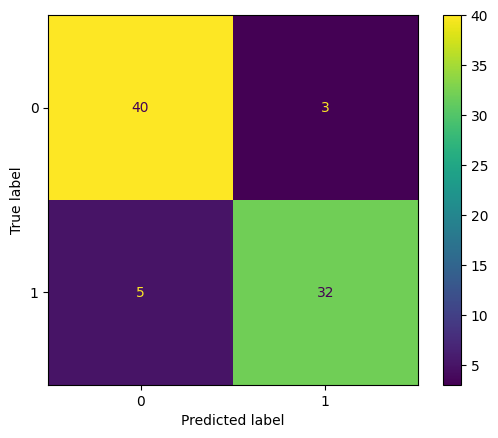

In [33]:
ConfusionMatrixDisplay.from_predictions(Y_test, Ypred)
plt.show

In [34]:
print(accuracy_score(Y_test,Ypred))

0.9
